## ส่วนใหม่

In [ ]:
!pip install opencv-python numpy matplotlib deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=7a175e228344ae8e4698671d91ffdad54dee7f380d2cbed06c7c062acee42c9b
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


เชื่อมต่อ colab กับ google drive (Mount Drive)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# แสดง content ที่อยู่ใน drive
!ls /content/drive/MyDrive

In [ ]:
# Set path ไฟล์รูปภาพ
path = '/content/drive/MyDrive/ComputerVisionUTCC/Images/'

(1773, 1330, 3)


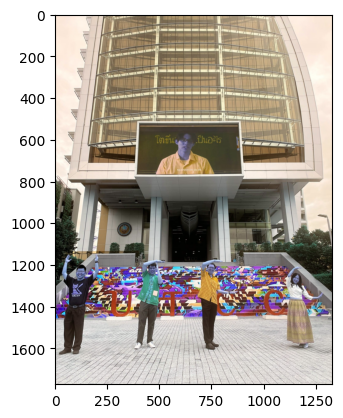

In [ ]:
# prompt: import cv2

import cv2
import matplotlib.pyplot as plt
image01 = cv2.imread(path + '/test.jpg')
assert image01 is not None, "file could not be read !!!"

print(image01.shape)
plt.imshow(image01)
plt.show()

(1773, 1330, 3)


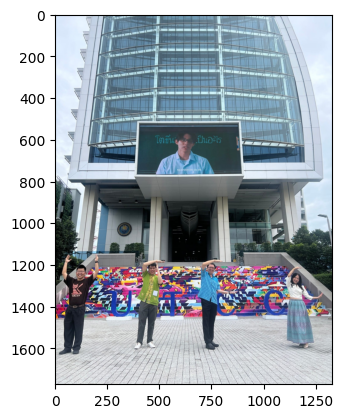

In [ ]:
# ปรับรูปจาก BGR เป็น RGB

import cv2
import matplotlib.pyplot as plt
image02 = cv2.imread(path + '/test.jpg')
assert image02 is not None, "file could not be read !!!"

print(image02.shape)
plt.imshow(cv2.cvtColor(image02, cv2.COLOR_BGR2RGB))
plt.show()

(1500, 1010, 3)


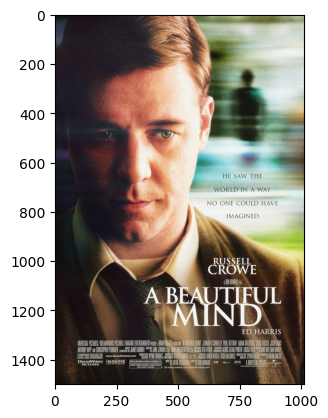

In [ ]:


import cv2
import matplotlib.pyplot as plt
image03 = cv2.imread(path + '/OneFace.jpg')
assert image03 is not None, "file could not be read !!!"

print(image03.shape)
plt.imshow(cv2.cvtColor(image03, cv2.COLOR_BGR2RGB))
plt.show()

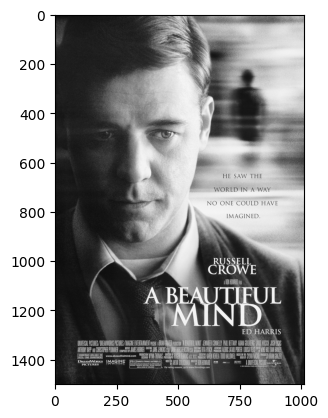

In [ ]:
# แปลงรูปเป็น gray scale
gray_image= cv2.cvtColor(image03, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray_image)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Save ไฟล์รูปลง Drive
cv2.imwrite(path + 'grayed_OneFace.jpg', gray_image)

True

Blur ภาพ

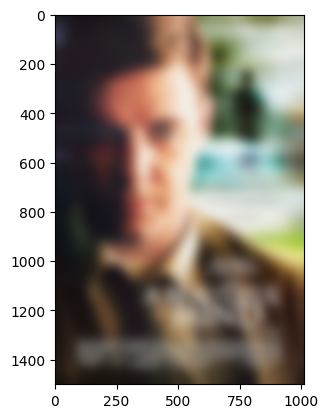

In [ ]:
blurred_image = cv2.GaussianBlur(image03,(145,145),0,0)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.show()


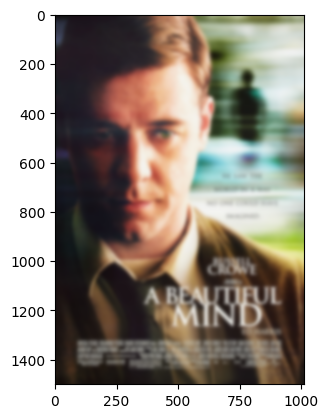

In [ ]:
blurred_image = cv2.GaussianBlur(image03,(45,45),0,0)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.show()

ต่อภาพ ( Image Concatenation )

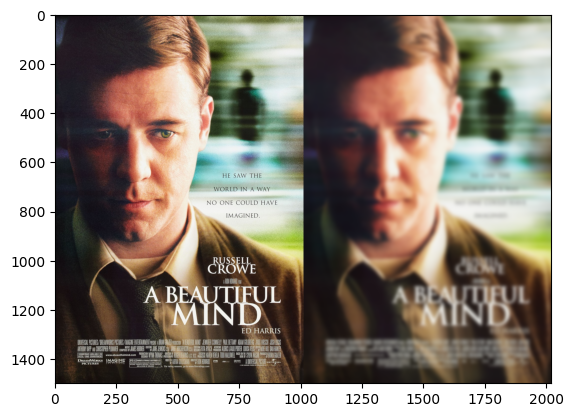

In [ ]:
import numpy as np
#ต่อภาพในแนวนอน
numpy_horizontal_concat = np.concatenate((image03,blurred_image),axis=1)
plt.imshow(cv2.cvtColor(numpy_horizontal_concat, cv2.COLOR_BGR2RGB))
plt.show()

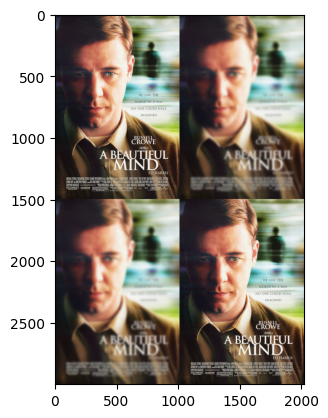

True

In [ ]:
#ต่อภาพในแนวตั้ง
numpy_horizontal_concat1 = np.concatenate((image03,blurred_image),axis=0)
plt.imshow(cv2.cvtColor(numpy_horizontal_concat1, cv2.COLOR_BGR2RGB))

numpy_horizontal_concat2 = np.concatenate((blurred_image,image03),axis=0)
plt.imshow(cv2.cvtColor(numpy_horizontal_concat2, cv2.COLOR_BGR2RGB))

numpy_horizontal_concat_final = np.concatenate((numpy_horizontal_concat1,numpy_horizontal_concat2),axis=1)
plt.imshow(cv2.cvtColor(numpy_horizontal_concat_final, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(path + 'numpy_horizontal_concat_final.jpg', numpy_horizontal_concat_final)

In [ ]:
numpy_horizontal_concat = np.concatenate((image03,blurred_image),axis=0)
plt.imshow(cv2.cvtColor(numpy_horizontal_concat, cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'np' is not defined

Edge Detection

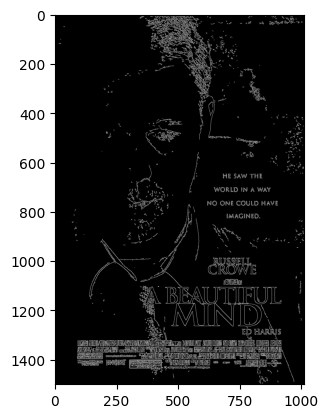

In [ ]:
edges01 =cv2.Canny(gray_image, 100, 200)
plt.imshow(edges01, cmap='gray')
plt.show()

(320, 320, 3)


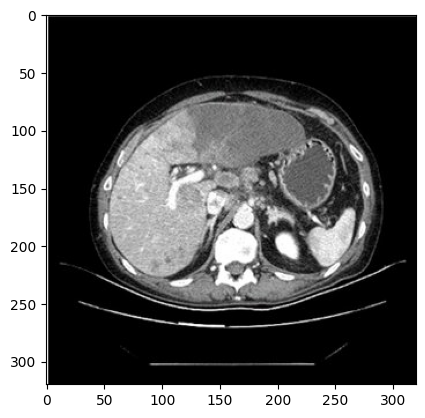

In [ ]:
import cv2
import matplotlib.pyplot as plt
image04 = cv2.imread(path + '/MedicalImage.jpg')
assert image04 is not None, "file could not be read !!!"

print(image04.shape)
plt.imshow(cv2.cvtColor(image04, cv2.COLOR_BGR2RGB))
plt.show()

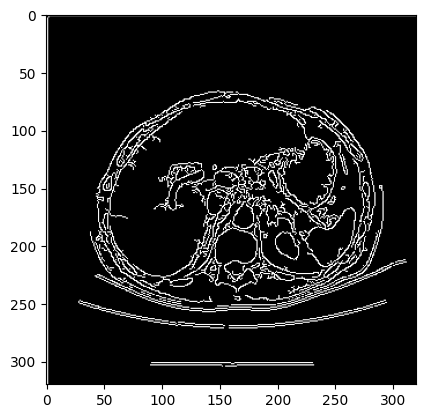

In [ ]:
edges02 =cv2.Canny(image04, 100, 500)
plt.imshow(edges02, cmap='gray')
plt.show()

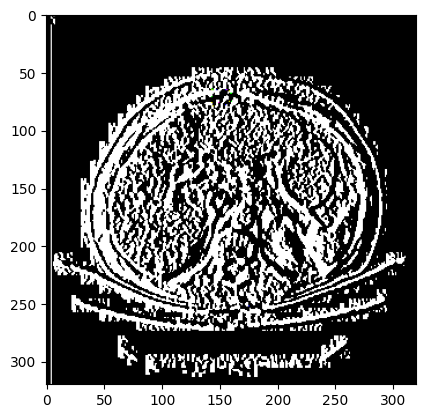

In [ ]:
edge03 = cv2.Sobel(image04, cv2.CV_64F,1,0, ksize=5)
plt.imshow(edge03, cmap= 'gray')

Face Detection

Haar Classifier

(275, 183, 3)


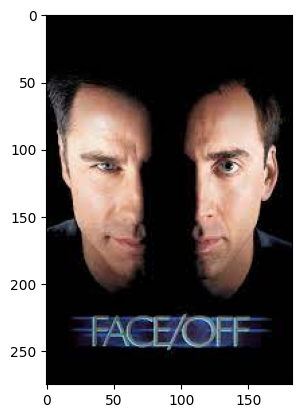

In [ ]:
import cv2
import matplotlib.pyplot as plt

img01 = cv2.imread(path + 'TwoFaces01.jpg')
assert img01 is not None, "หาไฟล์ไม่เจอจ่ะ !!!"

print (img01.shape)
plt.imshow(cv2.cvtColor(img01, cv2.COLOR_BGR2RGB))
plt.show()

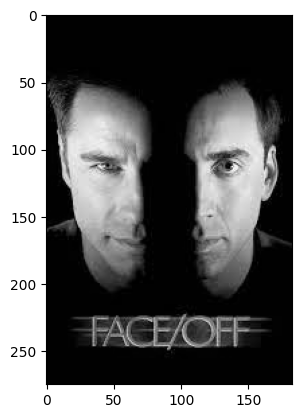

In [ ]:
# ปรับให้เป็น gray scale
gray_img01 = cv2.cvtColor(img01, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img01, cv2.COLOR_BGR2RGB))
plt.show()

Load face classifier

In [ ]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

ทำ face detection

In [ ]:
face01 = face_classifier.detectMultiScale(gray_img01)
print(face01)
print("จำนวนใบหน้าที่ detect ได้ =", face01.shape[0])

[[  8  71 110 110]
 [ 57  68 117 117]]
จำนวนใบหน้าที่ detect ได้ = 2


ตีกรอบใบหน้า

In [ ]:
for (x, y, w, h) in face01:
  cv2.rectangle(img01, (x, y), (x+w, y+h),
                               (0, 0, 255), 4)

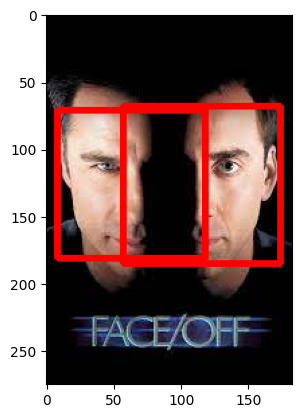

In [ ]:
img01_rgb = cv2.cvtColor(img01, cv2.COLOR_BGR2RGB)
#plt.figure(figsize=(20,10))
plt.imshow(img01_rgb)
plt.show()

(1024, 710, 3)


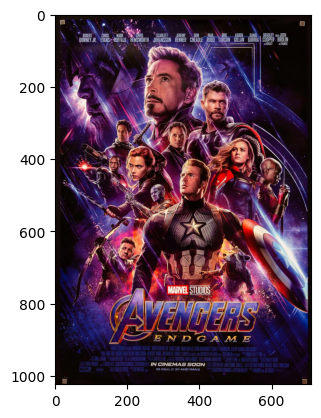

In [ ]:
import cv2
import matplotlib.pyplot as plt

img02 = cv2.imread(path + 'MultiFaces.jpg')
assert img02 is not None, "หาไฟล์ไม่เจอจ่ะ !!!"

print (img02.shape)
plt.imshow(cv2.cvtColor(img02, cv2.COLOR_BGR2RGB))
plt.show()

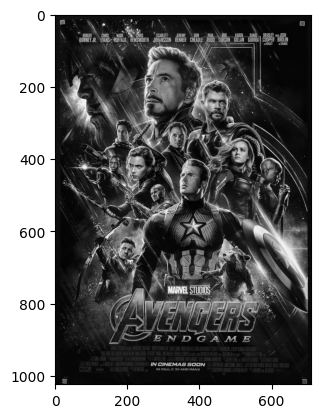

In [ ]:
gray_img02 = cv2.cvtColor(img02, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img02, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [ ]:
face02 = face_classifier.detectMultiScale(gray_img02)
print(face02)
print("จำนวนใบหน้าที่ detect ได้ =", face02.shape[0])

[[219 128 134 134]
 [163 309  42  42]
 [312 316  55  55]
 [478 353  58  58]
 [414 216  70  70]
 [145 400  33  33]
 [187 395  68  68]
 [325 418  74  74]
 [173 631  50  50]
 [ 74 584 126 126]]
จำนวนใบหน้าที่ detect ได้ = 10


In [ ]:
for (x, y, w, h) in face02:
  cv2.rectangle(img02, (x, y), (x+w, y+h),
                               (0, 0, 255), 4)

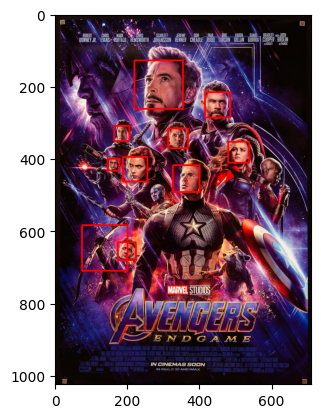

In [ ]:
img02_rgb = cv2.cvtColor(img02, cv2.COLOR_BGR2RGB)
#plt.figure(figsize=(20,10))
plt.imshow(img02_rgb)
plt.show()

การ detect อารมณ์ของใบหน้า

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=120539e2f4cd0538a8574fb795d5442e03879a6ae813c077c29239a8fddfa6b5
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


24-08-18 04:49:43 - Directory /root/.deepface has been created
24-08-18 04:49:43 - Directory /root/.deepface/weights has been created


Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

24-08-18 04:49:48 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

100%|██████████| 5.98M/5.98M [00:00<00:00, 71.5MB/s]
Action: age:  25%|██▌       | 1/4 [00:01<00:04,  1.43s/it]    

24-08-18 04:49:52 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:07, 72.7MB/s]
  4%|▍         | 23.1M/539M [00:00<00:05, 94.4MB/s]
  6%|▌         | 33.0M/539M [00:00<00:07, 70.0MB/s]
  9%|▉         | 50.9M/539M [00:00<00:04, 102MB/s] 
 12%|█▏        | 63.4M/539M [00:00<00:04, 98.2MB/s]
 14%|█▍        | 75.0M/539M [00:00<00:04, 101MB/s] 
 16%|█▌        | 86.0M/539M [00:01<00:05, 79.8MB/s]
 18%|█▊        | 99.6M/539M [00:01<00:04, 93.1MB/s]
 21%|██▏       | 115M/539M [00:01<00:03, 109MB/s]  
 24%|██▎       | 127M/539M [00:01<00:03, 104MB/s]
 26%|██▌       | 139M/539M [00:01<00:03, 105MB/s]
 28%|██▊       | 150M/539M [00:01<00:04, 90.0MB/s]
 31%|███       | 168M/539M [00:01<00:03, 110MB/s] 
 33%|███▎      | 180M/539M [00:01<00:04, 79.8MB/s]
 36%|███▌      | 195M/539M [00:02<00:03, 94.3MB/s]
 39%|███▉      | 210M/539M

24-08-18 04:50:05 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:07, 69.6MB/s]
  5%|▍         | 26.7M/537M [00:00<00:04, 110MB/s] 
  8%|▊         | 42.5M/537M [00:00<00:04, 109MB/s]
 11%|█         | 60.3M/537M [00:00<00:03, 131MB/s]
 14%|█▍        | 74.4M/537M [00:00<00:03, 117MB/s]
 16%|█▌        | 87.0M/537M [00:00<00:04, 112MB/s]
 20%|█▉        | 105M/537M [00:00<00:03, 123MB/s] 
 22%|██▏       | 119M/537M [00:01<00:03, 127MB/s]
 25%|██▍       | 133M/537M [00:01<00:03, 130MB/s]
 27%|██▋       | 147M/537M [00:01<00:03, 127MB/s]
 31%|███       | 164M/537M [00:01<00:02, 138MB/s]
 33%|███▎      | 178M/537M [00:01<00:02, 136MB/s]
 36%|███▌      | 192M/537M [00:01<00:02, 125MB/s]
 39%|███▊      | 208M/537M [00:01<00:02, 132MB/s]
 41%|████      | 221M/537M [00:01<00:02, 118MB/s]
 44%|████▍     | 235M/537M [00:01

24-08-18 04:50:25 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  1%|▏         | 6.82M/537M [00:00<00:07, 67.5MB/s]
  4%|▍         | 21.5M/537M [00:00<00:04, 109MB/s] 
  7%|▋         | 38.3M/537M [00:00<00:03, 135MB/s]
 10%|▉         | 51.9M/537M [00:00<00:05, 82.5MB/s]
 12%|█▏        | 62.4M/537M [00:00<00:06, 69.8MB/s]
 13%|█▎        | 70.8M/537M [00:01<00:08, 55.2MB/s]
 16%|█▌        | 84.4M/537M [00:01<00:07, 59.6MB/s]
 17%|█▋        | 91.2M/537M [00:01<00:15, 28.5MB/s]
 18%|█▊        | 96.5M/537M [00:02<00:16, 27.0MB/s]
 20%|██        | 107M/537M [00:02<00:11, 37.1MB/s] 
 22%|██▏       | 116M/537M [00:02<00:11, 36.3MB/s]
 23%|██▎       | 122M/537M [00:02<00:12, 34.1MB/s]
 24%|██▎       | 126M/537M [00:02<00:11, 34.9MB/s]
 25%|██▍       | 133M/537M [00:02<00:09, 40.7MB/s]
 26%|██▌       | 138M/537M [00:03<00:11, 34.1MB/s]
 27%|██▋    

sad


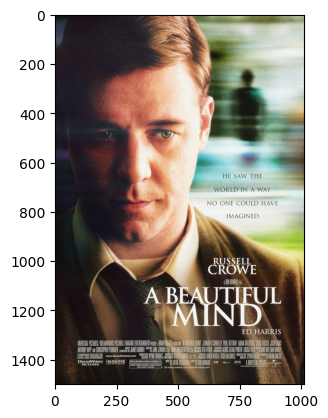

In [ ]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

img03 = cv2.imread(path + 'OneFace.jpg')
result = DeepFace.analyze(img_path=path+'OneFace.jpg',enforce_detection=False)
print(result[0]['dominant_emotion'])

plt.imshow(cv2.cvtColor(img03, cv2.COLOR_BGR2RGB))
plt.show()